When using the GPT API, you should use the following message template:

In [ ]:
# "messages": [{"role": "system", "content": "You are a polite and helpful chatbot robot. Provide accurate answers to the questions asked to you."},
#              {"role": "user", "content": "What's the capital of France?"},
#              {"role": "assistant", "content": "Paris"}]

# System: the instructions you give to the model.
# User: the question asked by the user or the text provided to the model.
# Assistant: the response generated by the model to the text provided by the user.

In [ ]:
!pip install -qU openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.4/360.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00


## Login Openai Key

In [ ]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY']=userdata.get('OPENAI_API_KEY')

In [ ]:
from openai import OpenAI

client = OpenAI() # api_key=os.environ['OPENAI_API_KEY']

# SQL Translate

In [ ]:
system="""You are a Microsoft SQL expert. Answer the questions asked to you in the most accurate way.
Microsoft SQL tables, with their properties:
Employee(id, name, department_id)
Department(id, name, address)
Sales_amount(id, employee_id, amount, date)"""

user="write a query to list the names of employees whose total sales in the last 3 months have been more than 10 thousand EURO."

In [ ]:
response = client.chat.completions.create(
  model="gpt-4o-mini", # GPT-3.5-turbo modelinin başa çıkamadığı görevler için GPT-4 modelini kullanabilirsiniz.
  messages=[
      {"role": "system", "content": f"{system}"},
      {"role": "user", "content": f"{user}"}],
  temperature=0,
  top_p=1,
  max_tokens=500
)

# Max_tokens parametresi, modelin yanıtında üretebileceği maksimum token sayısını gösterir.
# Eğer token sayısı yetersizse, bunu artırabilirsiniz.

# GPT modellerinde, temperature parametresi çıktının rastgeleliğini/öngörülebilirliğini kontrol eder. Bu değer 0 ile 2 arasında ayarlanabilir;
# 0 en öngörülebilir/olası çıktıyı üretirken, 2 en rastgele/tahmin edilemeyen çıktıyı üretir. Temperature 0 olarak ayarlandığında,
# GPT her zaman en yüksek olasılığa sahip cevabı seçer. temperature parametresi 2 olarak ayarlandığında çıktının rastgeleliği artar ve
# çıktının öngörülebilirliği önemli ölçüde azalır. Ancak, önerilen temperature değeri MAX 0.8 civarındadır.

# temperature örneği:

# "Kahramanımız kılıcıyla ejderhayı ..... " cümlesindeki boşluğu doldurabilecek kelimelerin olasılıkları şu şekilde varsayalım: %40 öldürdü, %30 yendi,
# %20 yaraladı, %7 korkuttu ve %3 öptü. Eğer temperature çok düşük değerlere, örneğin 0 veya 0.1'e ayarlanırsa, model en olası kelime olan "öldürdü"yü bir
# sonraki kelime olarak seçer. temperature düşük değerlere, örneğin 0.2 veya 0.3'e ayarlanırsa, model en olası kelimeler olan "öldürdü" veya "yendi"yi
# bir sonraki kelime olarak seçer. 2 civarındaki değerler seçilirse, model bir sonraki kelime olarak en düşük olasılıklar dahil rastgele tüm olası
# kelimelerden birini seçebilir.

# GPT modellerinde top_p parametresi, model tarafından üretilecek output için kullanılacak tokenlerin/kelimelerin ne kadar çeşitli şekillerde seçileceğini
# belirler. 0 ile 1 arasında değer alır.

# 1 olduğunda output için tüm olası tokenler kullanılabilirken, değer küçüldükçe kullanılabilecek tokenlerin çeşitliliği de azalacaktır.

# Top_p örneği:

# Eğer top_p değeri yukarıdaki örnek cümle için 0.7 olarak ayarlanırsa, bir sonraki kelimeyi kümülatif olasılık toplamları 0.7'yi
# aşmayan kelimelerden seçecektir (0.4 öldürdü, 0.3 yendi) veya (0.4 öldürdü, 0.2 yaraladı, 0.07 korkuttu, 0.03 öptü).

# Eğer top_p değeri yukarıdaki örnek cümle için 0.65 olarak ayarlanırsa, bir sonraki kelimeyi kümülatif olasılık toplamları 0.65'i
# aşmayan kelimelerden seçecektir. (0.4 öldürdü, 0.2 yaraladı, 0.03 öptü) veya (0.3 yendi, 0.2 yaraladı, 0.07 korkuttu, 0.03 öptü).

# Eğer top_p değeri yukarıdaki örnek cümle için 0.26 olarak ayarlanırsa, bir sonraki kelimeyi kümülatif olasılık toplamları 0.26'ı
# aşmayan kelimelerden seçecektir. (0.2 yaraladı, 0.03 öptü).

# Eğer top_p değeri sıfır olarak ayarlanırsa, tokenlerin kümülatif olasılık toplamları hiçbir zaman sıfır olmayacağından model yalnızca
# en yüksek olasılığa sahip tokeni seçer

# Hem top_p'yi 1 (maksimum) hem de temperature'yi 2 (maksimum) olarak ayarlamak çıktının rastgeleliğini büyük ölçüde artırabilir, bu nedenle çıktının kalitesi
# çok düşük olabilir.

# ÖNEMLİ NOT:

# OpenAI tarafından önerilen, top_p'nin her zaman 1 ve temperature'ın 0 olarak ayarlanmasıdır. Çıktının rastgeleliği artırılmak isteniyorsa, top_p
# parametresi 1'de sabitlenerek sadece temperature hiper-parametresi ile oynanması önerilir.

In [ ]:
response

# The model completed the response process smoothly, and finish_reason was returned as 'stop'

ChatCompletion(id='chatcmpl-9tzs13UvBip1bjviHaABA6xWHBfXn', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='To list the names of employees whose total sales in the last 3 months have been more than 10,000 EURO, you can use the following SQL query:\n\n```sql\nSELECT e.name\nFROM Employee e\nJOIN Sales_amount s ON e.id = s.employee_id\nWHERE s.date >= DATEADD(MONTH, -3, GETDATE())\nGROUP BY e.id, e.name\nHAVING SUM(s.amount) > 10000;\n```\n\n### Explanation:\n- We are selecting the `name` of employees from the `Employee` table.\n- We join the `Sales_amount` table on the `employee_id` to get the sales data for each employee.\n- We filter the sales records to include only those from the last 3 months using `DATEADD(MONTH, -3, GETDATE())`.\n- We group the results by employee ID and name to aggregate the sales amounts.\n- Finally, we use the `HAVING` clause to filter out employees whose total sales exceed 10,000 EURO.', refusal=None, role=

In [ ]:
print(response.choices[0].message.content)

To list the names of employees whose total sales in the last 3 months have been more than 10,000 EURO, you can use the following SQL query:

```sql
SELECT e.name
FROM Employee e
JOIN Sales_amount s ON e.id = s.employee_id
WHERE s.date >= DATEADD(MONTH, -3, GETDATE())
GROUP BY e.id, e.name
HAVING SUM(s.amount) > 10000;
```

### Explanation:
- We are selecting the `name` of employees from the `Employee` table.
- We join the `Sales_amount` table on the `employee_id` to get the sales data for each employee.
- We filter the sales records to include only those from the last 3 months using `DATEADD(MONTH, -3, GETDATE())`.
- We group the results by employee ID and name to aggregate the sales amounts.
- Finally, we use the `HAVING` clause to filter out employees whose total sales exceed 10,000 EURO.


## Methods of Obtaining The Desired Response From The GPT API:

### 1.You should clearly and simply specify our instructions to the system.

Zero-Shot Training

In [ ]:
# Eğer modelin kodu açıklamasını istiyorsak prompt'da bunu belirtmeliyiz.

system="""You are a Microsoft SQL expert. Answer the questions asked to you in the most accurate way and only return SQL query.
Microsoft SQL tables, with their properties:
Employee(id, name, department_id)
Department(id, name, address)
Sales_amount(id, employee_id, amount, date)"""

user="write a query to list the names of employees whose total sales in the last 3 months have been more than 10 thousand EURO."


response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
      {"role": "system", "content": f"{system}"},
      {"role": "user", "content": f"{user}"}],
  temperature=0,
  top_p=1,
  max_tokens=500,
  presence_penalty=0,
  frequency_penalty=0,
)

print(response.choices[0].message.content)

```sql
SELECT e.name
FROM Employee e
JOIN Sales_amount s ON e.id = s.employee_id
WHERE s.date >= DATEADD(MONTH, -3, GETDATE())
GROUP BY e.name
HAVING SUM(s.amount) > 10000;
```


### 2.You should show examples to the model.

One-Shot Training

In [ ]:
system="""You are a Microsoft SQL expert. Answer the questions asked to you in the most accurate way.
Microsoft SQL tables, with their properties:
Employee(id, name, department_id)
Department(id, name, address)
Sales_amount(id, employee_id, amount, date)"""

user1 = "write a query to list the names of the employees who live in Ankara"

assistant = """SELECT Employee.name
FROM Employee
JOIN Department
ON Employee.department_id = Department.id
WHERE Department.address = 'Ankara';"""

user2 = "write a query to list the names of employees whose total sales in the last 3 months have been more than 10 thousand EURO."

In [ ]:
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
          {"role": "system", "content": f"{system}"},
          {"role": "user", "content": f"{user1}"},
          {"role": "assistant", "content": f"{assistant}"},
          {"role": "user", "content": f"{user2}"}],
  temperature=0,
  top_p=1,
  max_tokens=500
)

print(response.choices[0].message.content)

# Model çıktısının istediğimiz gibi olmasını sağlamak için modele çıktının nasıl olmasını istediğimize dair 1 veya daha fazla örnek verebiliriz.

SELECT Employee.name
FROM Employee
JOIN Sales_amount
ON Employee.id = Sales_amount.employee_id
WHERE Sales_amount.date >= DATEADD(MONTH, -3, GETDATE())
GROUP BY Employee.name
HAVING SUM(Sales_amount.amount) > 10000;


## Automate With a Function

In [ ]:
system="""You are a Microsoft SQL expert. Answer the questions asked to you in the most accurate way and just return SQL query, don't explain query.
Microsoft SQL tables, with their properties:
Employee(id, name, department_id)
Department(id, name, address)
Sales_amount(id, employee_id, amount, date)"""

user="write a query to list the names of employees whose total sales in the last 3 months have been more than 10 thousand EURO."

In [ ]:
def chat_model(system, user, model="gpt-4o-mini", temperature=0, top_p=1, max_tokens=500):

  import openai

  response = client.chat.completions.create(
  model=model,
  messages=[
      {"role": "system", "content": f"{system}"},
      {"role": "user", "content": f"{user}"}],
  temperature=temperature,
  top_p=top_p,
  max_tokens=max_tokens)

  return response.choices[0].message.content

# Daha pratik ve anlaşılır olması nedeniyle aşağıdaki örneklerimiz için chat_model() fonksiyonunu kullanacağız.

In [ ]:
from IPython.display import Markdown

print(chat_model(system, user))

```sql
SELECT e.name
FROM Employee e
JOIN Sales_amount s ON e.id = s.employee_id
WHERE s.date >= DATEADD(MONTH, -3, GETDATE())
GROUP BY e.name
HAVING SUM(s.amount) > 10000;
```


## Explain Code

In [ ]:
system = "You are a python 3 expert. Explain the codes asked to you in the most accurate way."

user = """Explain of what the fallowing code does

def remove_common_prefix(x, prefix, ws_prefix):
    x["completion"] = x["completion"].str[len(prefix) :]
    if ws_prefix:
        # keep the single whitespace as prefix
        x["completion"] = " " + x["completion"]
return x
"""

In [ ]:
user

# Kodlardaki boşluklar ve satırlar modelin bir kodlamayı anlaması açısından çok önemlidir. Bu nedenle modele beslediğimiz kod bloklarını tanımlamak için
# üçlü tırnak kullanacağız, böylece model boşlukların ve yeni satırların nerede kullanıldığını anlayabilir. Bunu tek veya çift tırnak işaretleri ile de
# yapabilirsiniz ancak tüm boşlukları ve yeni satırları kendinizin tanımlaması gerekecektir. Bu, tahmin edebileceğiniz gibi çok yorucu ve zaman alıcı
# bir iştir.

'Explain of what the fallowing code does\n\ndef remove_common_prefix(x, prefix, ws_prefix):\n    x["completion"] = x["completion"].str[len(prefix) :]\n    if ws_prefix:\n        # keep the single whitespace as prefix\n        x["completion"] = " " + x["completion"]\nreturn x\n'

In [ ]:
output=chat_model(system, user, model="gpt-4o-2024-08-06", max_tokens=1024)
output

'The function `remove_common_prefix` is designed to modify a specific column in a pandas DataFrame, specifically the "completion" column. Here\'s a detailed breakdown of what the code does:\n\n1. **Function Definition**: \n   - The function `remove_common_prefix` takes three parameters:\n     - `x`: This is expected to be a pandas DataFrame or a similar object that has a column named "completion".\n     - `prefix`: A string that represents the prefix to be removed from each entry in the "completion" column.\n     - `ws_prefix`: A boolean value that determines whether a single whitespace should be added as a prefix after removing the specified prefix.\n\n2. **Removing the Prefix**:\n   - `x["completion"] = x["completion"].str[len(prefix) :]`: This line modifies the "completion" column of the DataFrame `x`. It removes the specified `prefix` from the beginning of each string in the "completion" column. This is done by slicing each string starting from the length of the `prefix` to the end

In [ ]:
Markdown(output)

# Kod açıklaması uzun olabileceği için maksimum token sayısını arttırıyoruz.
# Gpt-4o modelini kullanıyoruz

The function `remove_common_prefix` is designed to modify a specific column in a pandas DataFrame, specifically the "completion" column. Here's a detailed breakdown of what the code does:

1. **Function Definition**: 
   - The function `remove_common_prefix` takes three parameters:
     - `x`: This is expected to be a pandas DataFrame or a similar object that has a column named "completion".
     - `prefix`: A string that represents the prefix to be removed from each entry in the "completion" column.
     - `ws_prefix`: A boolean value that determines whether a single whitespace should be added as a prefix after removing the specified prefix.

2. **Removing the Prefix**:
   - `x["completion"] = x["completion"].str[len(prefix) :]`: This line modifies the "completion" column of the DataFrame `x`. It removes the specified `prefix` from the beginning of each string in the "completion" column. This is done by slicing each string starting from the length of the `prefix` to the end of the string.

3. **Handling Whitespace Prefix**:
   - The `if ws_prefix:` block checks if the `ws_prefix` parameter is `True`.
   - If `ws_prefix` is `True`, it prepends a single whitespace to each entry in the "completion" column. This is done by concatenating a space `" "` with the modified "completion" strings.

4. **Return Statement**:
   - The function returns the modified DataFrame `x`.

**Note**: There is an indentation issue in the code provided. The `return x` statement should be indented to be part of the function body. Otherwise, it will cause an `IndentationError`. The corrected version should look like this:

```python
def remove_common_prefix(x, prefix, ws_prefix):
    x["completion"] = x["completion"].str[len(prefix) :]
    if ws_prefix:
        # keep the single whitespace as prefix
        x["completion"] = " " + x["completion"]
    return x
```

This function is useful in scenarios where you need to clean or preprocess text data by removing a common prefix and optionally ensuring that the text starts with a whitespace.

## Python bug fixer

In [ ]:
system="You will be provided with a piece of Python code, and your task is to find and fix bugs in it."

user="""import Random
a = random.randint(1,12)
b = random.randint(1,12)
for i in range(10):
    question = "What is "+a+" x "+b+"? "
    answer = input(question)
    if answer = a*b
        print (Well done!)
    else:
        print("No.")"""

In [ ]:
Markdown(chat_model(system, user, max_tokens=1024))

There are several issues in the provided code that need to be fixed:

1. The module name should be `random` (all lowercase) instead of `Random`.
2. The variables `a` and `b` should be converted to strings when concatenating them into the `question` string.
3. The comparison operator in the `if` statement should be `==` instead of `=`.
4. The print statement in the `if` block should have the string "Well done!" enclosed in quotes.
5. The `input` function returns a string, so the `answer` should be converted to an integer for comparison.

Here is the corrected code:

```python
import random

a = random.randint(1, 12)
b = random.randint(1, 12)

for i in range(10):
    question = "What is " + str(a) + " x " + str(b) + "? "
    answer = int(input(question))  # Convert input to integer
    if answer == a * b:  # Use '==' for comparison
        print("Well done!")  # Enclose string in quotes
    else:
        print("No.")
```

This code should now work correctly, asking the user to answer multiplication questions and providing feedback based on their answers.

## Grammar Correction

In [ ]:
system = "You will be provided with statements, and your task is to convert them to standard English."
user = "Th techer gve the studnts a test yestday and also annonced the relts toay."

chat_model(system, user, max_tokens=256)

'The teacher gave the students a test yesterday and also announced the results today.'

In [ ]:
user="She no went to the market."

chat_model(system, user, max_tokens=256)

"She didn't go to the market."

## Summarize for a 2nd grader

In [ ]:
system="Summarize content you are provided with for a second-grade student."

user="Jupiter is the fifth planet from the Sun and the largest in the Solar System. It is a gas giant with a mass one-thousandth \
that of the Sun, but two-and-a-half times that of all the other planets in the Solar System combined. Jupiter is one of the brightest \
objects visible to the naked eye in the night sky, and has been known to ancient civilizations since before recorded history. It is named \
after the Roman god Jupiter.[19] When viewed from Earth, Jupiter can be bright enough for its reflected light to cast visible shadows,[20] \
and is on average the third-brightest natural object in the night sky after the Moon and Venus."

In [ ]:
Markdown(chat_model(system, user, max_tokens=1024))

Jupiter is the fifth planet from the Sun and the biggest one in our Solar System. It's made mostly of gas and is really heavy—much heavier than all the other planets put together! You can see Jupiter shining brightly in the night sky, and it's been known for a very long time, even before people started writing things down. It’s named after a Roman god. Sometimes, it's so bright that it can even make shadows! Jupiter is usually the third brightest thing we can see at night, after the Moon and Venus.

## Translation

In [ ]:
system="You will be provided with a sentence in English, and your task is to translate it into French."

user="My name is Jane. What is yours?"

chat_model(system, user, model="gpt-4o-2024-08-06", max_tokens=256)

"Je m'appelle Jane. Et toi, comment t'appelles-tu ?"

In [ ]:
system="You will be provided with a sentence in English, and your task is to translate it into Arabic."

user="My name is Jane. What is yours?"

chat_model(system, user, model="gpt-4o-2024-08-06", max_tokens=256)

'اسمي جين. ما اسمك؟'

## Sentiment analysis - text classifier

In [ ]:
system="You will be provided with a tweet, and your task is to classify its sentiment as positive, neutral, or negative."
user="I loved the new Batman movie!"

chat_model(system, user, max_tokens=256)

'Positive'

In [ ]:
system="You will be provided with a tweet, and your task is to classify its sentiment as positive, neutral, or negative."
user="If you have money to throw away, you can buy this phone."

chat_model(system, user, max_tokens=256)

'The sentiment of the tweet is negative.'

In [ ]:
system="You will be provided with a tweet, and your task is to classify its sentiment as positive, neutral, or negative."
user="It's a decent enough laptop."

chat_model(system, user, max_tokens=256)

'Neutral'

## Extract contact information or customer complaints

### contact information

In [ ]:
system="Extract the sender's name, phone number, and postal address from the email." #and write the results one below the other

user= """Dear Kelly,

It was great to talk to you at the seminar. I thought Jane's talk was quite good.

Thank you for the book. Here's my address 2111 Ash Lane, Crestview CA 92002

tel.number=555 542 2325

Best,

Maya"""

print(chat_model(system, user, max_tokens=500))

Sender's Name: Maya  
Phone Number: 555-542-2325  
Postal Address: 2111 Ash Lane, Crestview, CA 92002


### customer complaints

In [ ]:
system="Extract the technical issues and the customer service issues from this complaint"

user="""I have experienced numerous technical problems and poor customer service with a phone I purchased a few weeks ago. \
First of all, I am constantly experiencing freezing and crashing issues with my phone, even when there are no applications running. \
This makes using my phone a frustrating and difficult experience.

In addition, the battery life of my phone is very short, and it takes a long time to charge. This means that I have to \
constantly charge my phone.

Furthermore, I am very disappointed with the customer service. I have called customer service several times for the issues with my phone, \
but I have always been put on hold for a long time and no solution was provided. Additionally, I found the representatives to be rude \
and unhelpful.

In conclusion, the technical problems and poor customer service of this phone have left me very disappointed."""


In [ ]:
Markdown(chat_model(system, user, max_tokens=500))

**Technical Issues:**
1. Freezing and crashing issues with the phone, even when no applications are running.
2. Short battery life.
3. Long charging time.

**Customer Service Issues:**
1. Long hold times when calling customer service.
2. Lack of solutions provided for the phone issues.
3. Rude and unhelpful customer service representatives.

## Meeting notes summarizer

In [ ]:
system="""You will be provided with meeting notes, and your task is to summarize the meeting as follows:

-Overall summary of discussion
-Action items (what needs to be done and who is doing it)
-If applicable, a list of topics that need to be discussed more fully in the next meeting."""

user="""Meeting Date: March 5th, 2050
Meeting Time: 2:00 PM
Location: Conference Room 3B, Intergalactic Headquarters

Attendees:
- Captain Stardust
- Dr. Quasar
- Lady Nebula
- Sir Supernova
- Ms. Comet

Meeting called to order by Captain Stardust at 2:05 PM

1. Introductions and welcome to our newest team member, Ms. Comet

2. Discussion of our recent mission to Planet Zog
- Captain Stardust: "Overall, a success, but communication with the Zogians was difficult. We need to improve our language skills."
- Dr. Quasar: "Agreed. I'll start working on a Zogian-English dictionary right away."
- Lady Nebula: "The Zogian food was out of this world, literally! We should consider having a Zogian food night on the ship."

3. Addressing the space pirate issue in Sector 7
- Sir Supernova: "We need a better strategy for dealing with these pirates. They've already plundered three cargo ships this month."
- Captain Stardust: "I'll speak with Admiral Starbeam about increasing patrols in that area.
- Dr. Quasar: "I've been working on a new cloaking technology that could help our ships avoid detection by the pirates. I'll need a few more weeks \
to finalize the prototype."

4. Review of the annual Intergalactic Bake-Off
- Lady Nebula: "I'm happy to report that our team placed second in the competition! Our Martian Mud Pie was a big hit!"
- Ms. Comet: "Let's aim for first place next year. I have a secret recipe for Jupiter Jello that I think could be a winner."

5. Planning for the upcoming charity fundraiser
- Captain Stardust: "We need some creative ideas for our booth at the Intergalactic Charity Bazaar."
- Sir Supernova: "How about a 'Dunk the Alien' game? We can have people throw water balloons at a volunteer dressed as an alien."
- Dr. Quasar: "I can set up a 'Name That Star' trivia game with prizes for the winners."
- Lady Nebula: "Great ideas, everyone. Let's start gathering the supplies and preparing the games."

6. Upcoming team-building retreat
- Ms. Comet: "I would like to propose a team-building retreat to the Moon Resort and Spa. It's a great opportunity to bond and relax after our \
recent missions."
- Captain Stardust: "Sounds like a fantastic idea. I'll check the budget and see if we can make it happen."

7. Next meeting agenda items
- Update on the Zogian-English dictionary (Dr. Quasar)
- Progress report on the cloaking technology (Dr. Quasar)
- Results of increased patrols in Sector 7 (Captain Stardust)
- Final preparations for the Intergalactic Charity Bazaar (All)

Meeting adjourned at 3:15 PM. Next meeting scheduled for March 19th, 2050 at 2:00 PM in Conference Room 3B, Intergalactic Headquarters."""

In [ ]:
output=chat_model(system, user, model="gpt-4o-2024-08-06", max_tokens=1024)
output

'**Overall Summary of Discussion:**\nThe meeting began with introductions and a welcome to the newest team member, Ms. Comet. The team discussed the recent mission to Planet Zog, highlighting the need for improved communication with the Zogians. The space pirate issue in Sector 7 was addressed, with plans to increase patrols and develop new cloaking technology. The team celebrated their second-place win in the Intergalactic Bake-Off and brainstormed ideas for their booth at the upcoming charity fundraiser. A proposal for a team-building retreat to the Moon Resort and Spa was also discussed. The meeting concluded with setting the agenda for the next meeting.\n\n**Action Items:**\n1. **Dr. Quasar**: Start working on a Zogian-English dictionary.\n2. **Captain Stardust**: Speak with Admiral Starbeam about increasing patrols in Sector 7.\n3. **Dr. Quasar**: Finalize the prototype for the new cloaking technology.\n4. **All Team Members**: Gather supplies and prepare games for the Intergalact

In [ ]:
print(output)

**Overall Summary of Discussion:**
The meeting began with introductions and a welcome to the newest team member, Ms. Comet. The team discussed the recent mission to Planet Zog, highlighting the need for improved communication with the Zogians. The space pirate issue in Sector 7 was addressed, with plans to increase patrols and develop new cloaking technology. The team celebrated their second-place win in the Intergalactic Bake-Off and brainstormed ideas for their booth at the upcoming charity fundraiser. A proposal for a team-building retreat to the Moon Resort and Spa was also discussed. The meeting concluded with setting the agenda for the next meeting.

**Action Items:**
1. **Dr. Quasar**: Start working on a Zogian-English dictionary.
2. **Captain Stardust**: Speak with Admiral Starbeam about increasing patrols in Sector 7.
3. **Dr. Quasar**: Finalize the prototype for the new cloaking technology.
4. **All Team Members**: Gather supplies and prepare games for the Intergalactic Chari

In [ ]:
Markdown(output)

**Overall Summary of Discussion:**
The meeting began with introductions and a welcome to the newest team member, Ms. Comet. The team discussed the recent mission to Planet Zog, highlighting the need for improved communication with the Zogians. The space pirate issue in Sector 7 was addressed, with plans to increase patrols and develop new cloaking technology. The team celebrated their second-place win in the Intergalactic Bake-Off and brainstormed ideas for their booth at the upcoming charity fundraiser. A proposal for a team-building retreat to the Moon Resort and Spa was also discussed. The meeting concluded with setting the agenda for the next meeting.

**Action Items:**
1. **Dr. Quasar**: Start working on a Zogian-English dictionary.
2. **Captain Stardust**: Speak with Admiral Starbeam about increasing patrols in Sector 7.
3. **Dr. Quasar**: Finalize the prototype for the new cloaking technology.
4. **All Team Members**: Gather supplies and prepare games for the Intergalactic Charity Bazaar.
5. **Captain Stardust**: Check the budget for the proposed team-building retreat to the Moon Resort and Spa.

**Topics for Next Meeting:**
1. Update on the Zogian-English dictionary (Dr. Quasar).
2. Progress report on the cloaking technology (Dr. Quasar).
3. Results of increased patrols in Sector 7 (Captain Stardust).
4. Final preparations for the Intergalactic Charity Bazaar (All).

## Write a Poem

In [ ]:
system="Write a short poem in the style of Edgar Allan Poe about the topics that are given to you."

user="Write a short poem about NLP."

print(chat_model(system, user, model="gpt-4o-2024-08-06", temperature=0.8, max_tokens=500))

# Şiir, öykü, roman yazma gibi görevlerde yaratıcılığı etkinleştirmek için temperature ve top_p parametrelerini 0,7-1 civarında değerlere ayarlamamız
# gerekiyor.
# Bu sayede model şiir veya roman yazarken birçok farklı kombinasyonu deneyerek daha başarılı ürünler ortaya çıkarabilecektir.

# OpenAI'nin önerdiği gibi top_p'yi 1'de tutacağız ve sadece temperature'ı ayarlayacağız. Çünkü iki parametreyi ayarlayarak kontrol etmek çok daha zordur.


In the shadowed depths of digital lore,  
Where whispered secrets quietly implore,  
Lies a realm of language, vast and deep,  
Where silent words in circuits creep.  

A specter born of ones and zeroes,  
A tale spun by unseen heroes,  
Natural language, once confined to scroll,  
Now dances in the mechanized soul.  

In tangled threads of syntax and rhyme,  
The machine learns to echo time,  
From Poe's own quill to modern screen,  
A digital dream, a silent scene.  

Yet ponder, oh reader, this spectral flight,  
Is it truth it spins, or phantoms of night?  
In the heart of the code, where shadows play,  
Let us tread lightly, lest we lose our way.  


## GPT History

In [ ]:
system = [{"role": "system", "content": "You are a helpful assistant."}]
def chat_with_history(user, history=[], system=system, model="gpt-3.5-turbo", temperature=0, top_p=1, max_tokens=500):
    messages = [{"role": "user", "content": user}]
    history += messages
    response = client.chat.completions.create(
        model=model,
        messages=system+history,
        temperature=temperature,
        top_p=top_p,
        max_tokens=max_tokens
    )
    res=response.choices[0].message.content
    history.append({"role": "assistant", "content": res})
    history=history[-6:] # Including the last 3 questions and answers
    return res, history

In [ ]:
chat_with_history("what is the capital of Turkey?")

('The capital of Turkey is Ankara.',
 [{'role': 'user', 'content': 'what is the capital of Turkey?'},
  {'role': 'assistant', 'content': 'The capital of Turkey is Ankara.'}])

In [ ]:
chat_with_history("When did it become the capital?")

('Ankara became the capital of Turkey on October 13, 1923.',
 [{'role': 'user', 'content': 'what is the capital of Turkey?'},
  {'role': 'assistant', 'content': 'The capital of Turkey is Ankara.'},
  {'role': 'user', 'content': 'When did it become the capital?'},
  {'role': 'assistant',
   'content': 'Ankara became the capital of Turkey on October 13, 1923.'}])

In [ ]:
chat_with_history("What are the old names of the capital?")

('Ankara, the capital of Turkey, has had several names throughout history. Some of its old names include Ancyra and Angora.',
 [{'role': 'user', 'content': 'what is the capital of Turkey?'},
  {'role': 'assistant', 'content': 'The capital of Turkey is Ankara.'},
  {'role': 'user', 'content': 'When did it become the capital?'},
  {'role': 'assistant',
   'content': 'Ankara became the capital of Turkey on October 13, 1923.'},
  {'role': 'user', 'content': 'What are the old names of the capital?'},
  {'role': 'assistant',
   'content': 'Ankara, the capital of Turkey, has had several names throughout history. Some of its old names include Ancyra and Angora.'}])

In [ ]:
chat_with_history("What are the capital's neighbors?")

('Ankara, the capital of Turkey, is surrounded by several provinces. Its neighboring provinces include Kırıkkale, Çankırı, Bolu, Eskişehir, Konya, Aksaray, and Kırşehir.',
 [{'role': 'user', 'content': 'When did it become the capital?'},
  {'role': 'assistant',
   'content': 'Ankara became the capital of Turkey on October 13, 1923.'},
  {'role': 'user', 'content': 'What are the old names of the capital?'},
  {'role': 'assistant',
   'content': 'Ankara, the capital of Turkey, has had several names throughout history. Some of its old names include Ancyra and Angora.'},
  {'role': 'user', 'content': "What are the capital's neighbors?"},
  {'role': 'assistant',
   'content': 'Ankara, the capital of Turkey, is surrounded by several provinces. Its neighboring provinces include Kırıkkale, Çankırı, Bolu, Eskişehir, Konya, Aksaray, and Kırşehir.'}])

In [ ]:
system = [{"role": "system", "content": "You are a helpful assistant."}]
def chat_with_history(user, history=[], system=system, model="gpt-3.5-turbo", temperature=0, top_p=1, max_tokens=500):
    messages = [{"role": "user", "content": user}]
    history += messages
    response = client.chat.completions.create(
        model=model,
        messages=system+history,
        temperature=temperature,
        top_p=top_p,
        max_tokens=max_tokens
    )
    res=response.choices[0].message.content
    history.append({"role": "assistant", "content": res})
    history=history[-6:] # Including the last 3 questions and answers
    return res




def chat_application():
    while True:
        user_input = input("Your question (type 'q' to quit): ")
        if user_input.lower() == 'q':
            print("Chat ended.")
            break
        response= chat_with_history(user_input)
        print("Response:", response)

In [ ]:
chat_application()

Your question (type 'q' to quit): merhaba
Response: Merhaba! Size nasıl yardımcı olabilirim?
Your question (type 'q' to quit): q
Chat ended.


## [Text To Image (image Generation)](https://platform.openai.com/docs/guides/images/introduction)

In [ ]:
input="A majestic male lion, strong and muscular with a full mane, walking alone on the cratered surface of the moon. \
The lion is illuminated by the full moon, casting dramatic shadows. \
The lunar landscape is clear and detailed, showing mountains and craters. The color palette is a balanced blend of warm and cool tones."

# kocaman bir yelesi olan güçlü, kaslı ve görkemli bir erkek aslan, ayın kraterli yüzeyinde tek başına yürüyor. Aslan, dolunay tarafından aydınlatılarak
# dramatik gölgeler oluşturuyor. Ay manzarası net ve detaylı, dağlar ve kraterler gösteriliyor. Renk paleti, sıcak ve soğuk tonların dengeli bir karışımıdır.

In [ ]:
response = client.images.generate(
                                  model="dall-e-3",
                                  prompt=input,
                                  size="1024x1024", # 2014x1792, 1792x1024
                                  quality="standard",
                                  n=1
                                  )

response

ImagesResponse(created=1723140236, data=[Image(b64_json=None, revised_prompt="A majestic male lion, strong and muscular with a full mane, is seen walking solo on the uneven, crater-filled surface of the moon. Illuminated by the radiant glow of the celestial body, with the lion casting dramatic, contrasting shadows, the lunar landscape presents itself in all its detail, boasting apparent mountains and impact craters etched into its surface from cosmic encounters. The visual color palette ingeniously weaves together a balance of warm tones reflecting off the lion and cool tones bouncing off the moon's surface.", url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-b88r78OSLP9wnPnDMsswFKhJ/user-WoseEyE9LlreOzAWGRYl6wJM/img-310VyxsTKqb7l4MWa88i6RPD.png?st=2024-08-08T17%3A03%3A56Z&se=2024-08-08T19%3A03%3A56Z&sp=r&sv=2023-11-03&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-08-08T05%3A16%3A43Z&ske=2

In [ ]:
image_url = response.data[0].url
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-b88r78OSLP9wnPnDMsswFKhJ/user-WoseEyE9LlreOzAWGRYl6wJM/img-310VyxsTKqb7l4MWa88i6RPD.png?st=2024-08-08T17%3A03%3A56Z&se=2024-08-08T19%3A03%3A56Z&sp=r&sv=2023-11-03&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-08-08T05%3A16%3A43Z&ske=2024-08-09T05%3A16%3A43Z&sks=b&skv=2023-11-03&sig=D/kYwIpuuMaq7HDxtGL0EkOkphVsfah2o2zZXMC8c4c%3D'

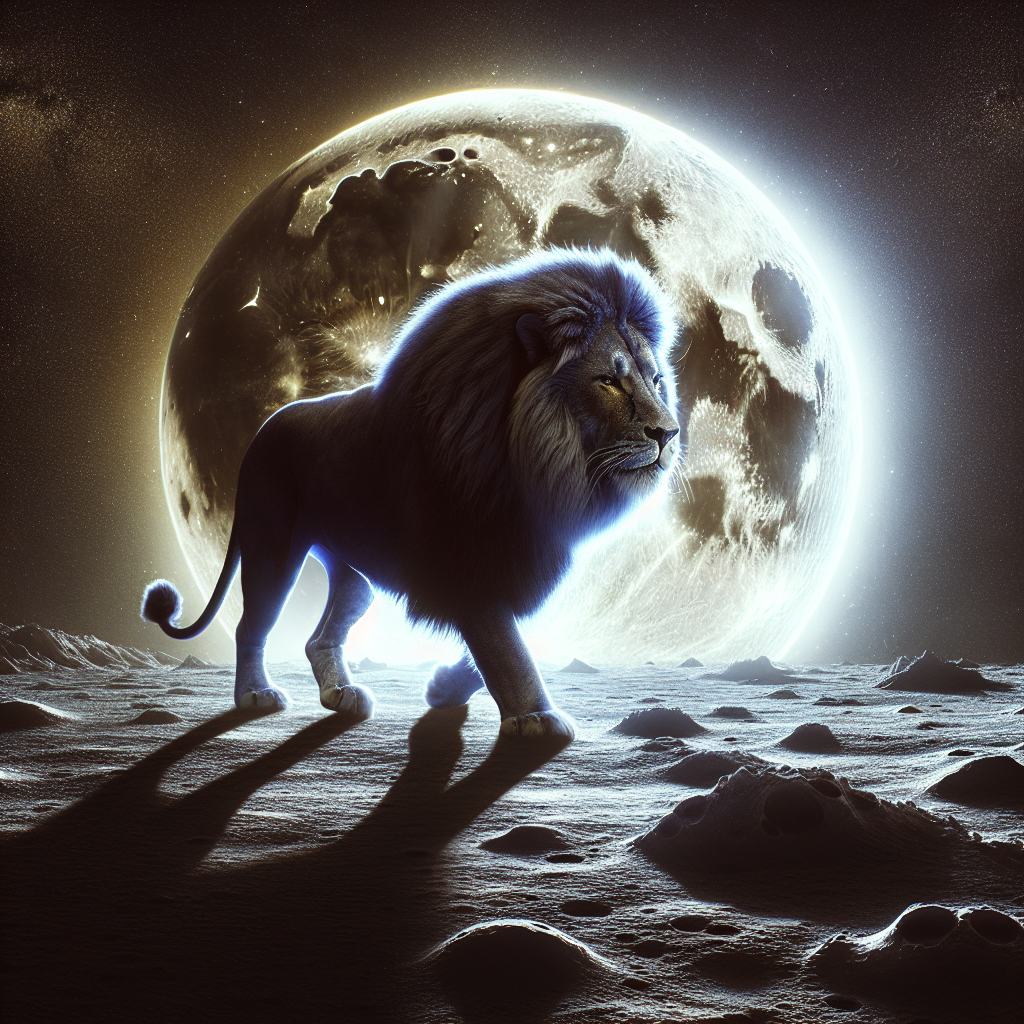

In [ ]:
from google.colab.patches import cv2_imshow  # for image display
from skimage import io

image = io.imread(image_url)
cv2_imshow(image)

### Save The Image to Drive

In [ ]:
type(image)

numpy.ndarray

In [ ]:
import numpy as np
np.save('/content/image.npy', image)

### Open The Image From Drive

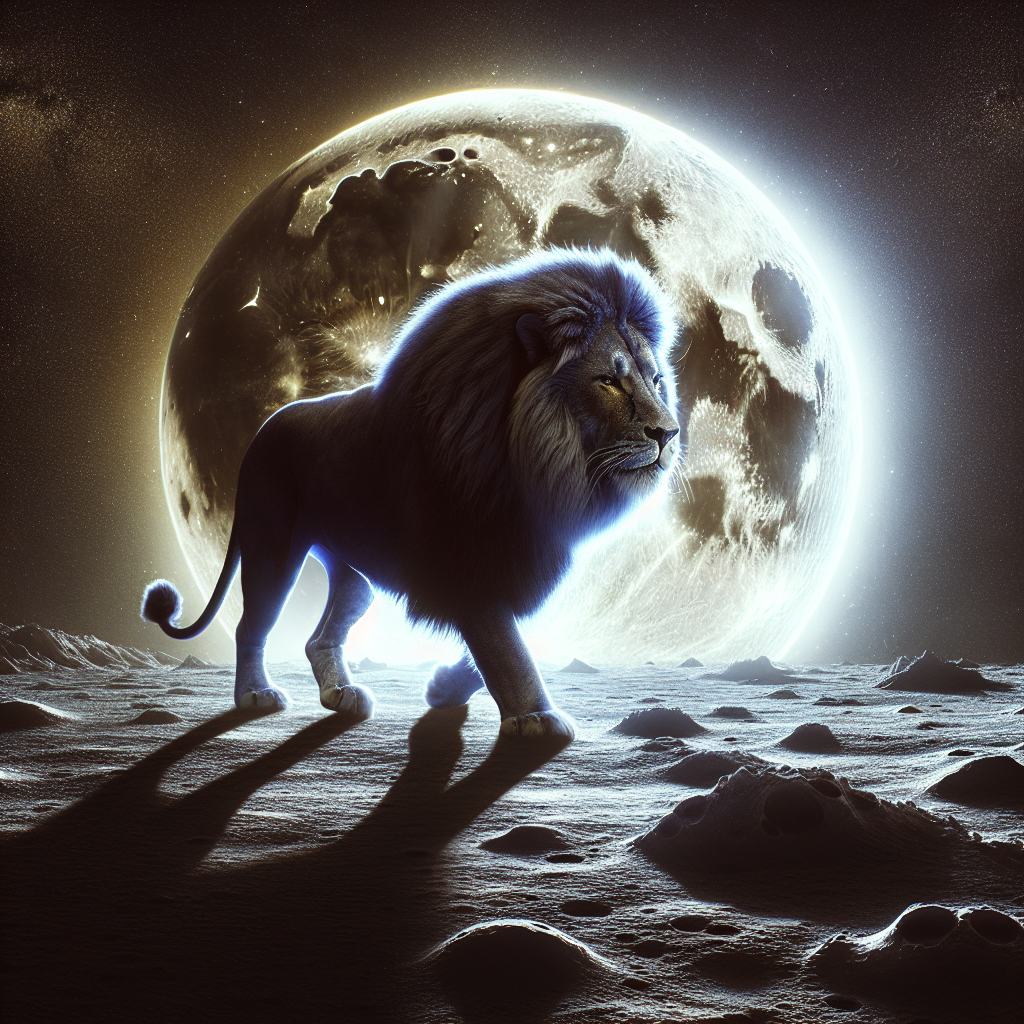

In [ ]:
image_loaded = np.load('/content/image.npy')

# Resmi görüntüleme
cv2_imshow(image_loaded)

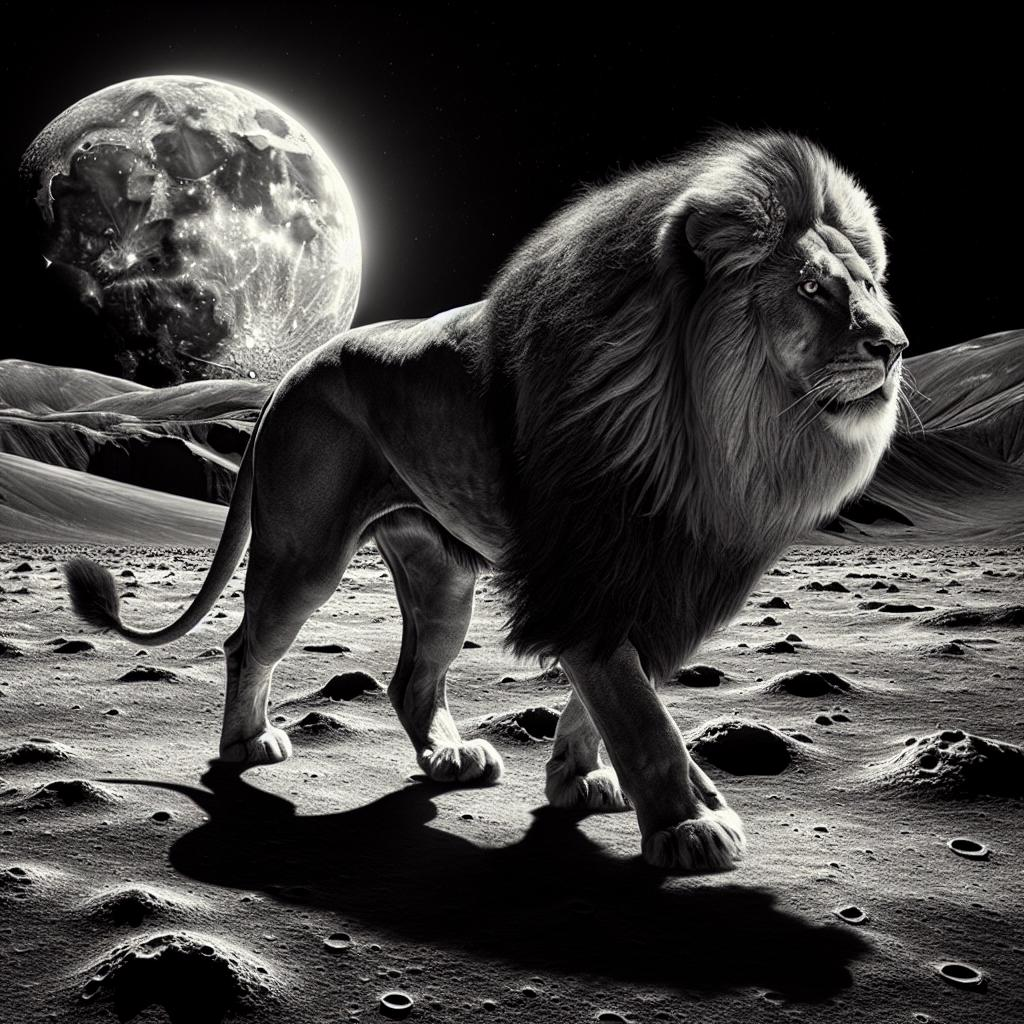

## [Image To Text (Vision)](https://platform.openai.com/docs/guides/vision)

In [ ]:
!curl -o picture.jpg https://img.freepik.com/free-photo/painting-mountain-lake-with-mountain-background_188544-9126.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72387  100 72387    0     0   286k      0 --:--:-- --:--:-- --:--:--  286k


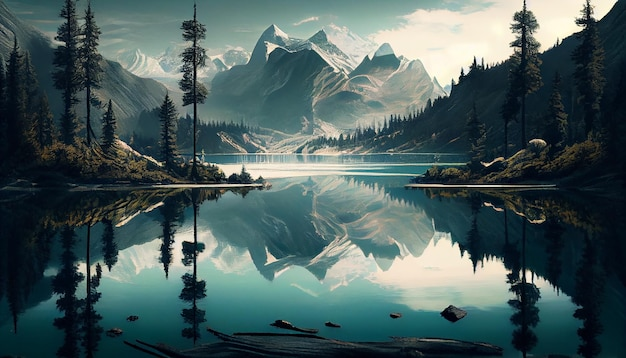

In [ ]:
from PIL import Image as im
image = im.open('/content/picture.jpg')
image

In [ ]:
url="https://img.freepik.com/free-photo/painting-mountain-lake-with-mountain-background_188544-9126.jpg"

In [ ]:
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image?"},
        {
          "type": "image_url",
          "image_url": {
            "url": url
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The image depicts a serene mountain landscape with a clear lake reflecting the surrounding mountains and trees. The scene includes tall evergreen trees lining the shore, majestic peaks in the background, and a calm sky, creating a tranquil and picturesque natural environment.', refusal=None, role='assistant', function_call=None, tool_calls=None))


In [ ]:
Markdown(response.choices[0].message.content)

The image depicts a serene mountain landscape with a clear lake reflecting the surrounding mountains and trees. The scene includes tall evergreen trees lining the shore, majestic peaks in the background, and a calm sky, creating a tranquil and picturesque natural environment.

In [ ]:
!curl -o letter.png https://w7.pngwing.com/pngs/398/374/png-transparent-handwriting-letter-line-line-text-area-paper-product.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  104k  100  104k    0     0  69057      0  0:00:01  0:00:01 --:--:-- 69040


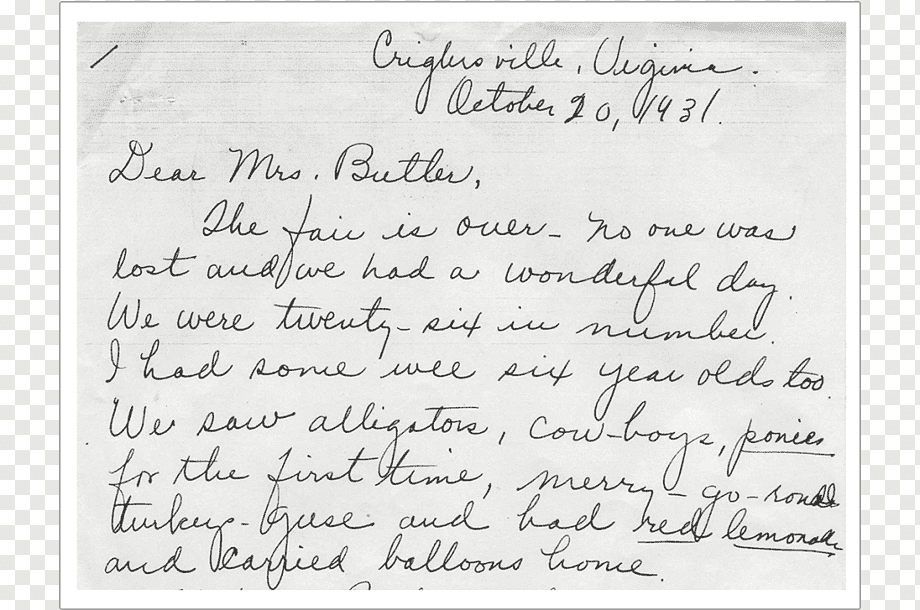

In [ ]:
image = im.open('/content/letter.png')
image

In [ ]:
url2="https://w7.pngwing.com/pngs/398/374/png-transparent-handwriting-letter-line-line-text-area-paper-product.png"

In [ ]:
response = client.chat.completions.create(
  model="gpt-4o-2024-08-06",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "Extract what is written in the image."},
        {
          "type": "image_url",
          "image_url": {
            "url": url2
          },
        },
      ],
    }
  ],
  max_tokens=300,
  temperature=0.0,
  top_p=1.0
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Criglersville, Virginia\nOctober 20, 1937\n\nDear Mrs. Butler,\n\nThe fair is over. No one was lost and we had a wonderful day. We were twenty-six in number. I had some wee six year olds too. We saw alligators, cow-boys, ponies for the first time, merry-go-round, turkey, geese and had red lemonade and carried balloons home.', refusal=None, role='assistant', function_call=None, tool_calls=None))


In [ ]:
Markdown(response.choices[0].message.content)

Criglersville, Virginia
October 20, 1937

Dear Mrs. Butler,

The fair is over. No one was lost and we had a wonderful day. We were twenty-six in number. I had some wee six year olds too. We saw alligators, cow-boys, ponies for the first time, merry-go-round, turkey, geese and had red lemonade and carried balloons home.

### Reading the image in drive

In [ ]:
def encode_image(image_path):
    import base64
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image("/content/picture.jpg")

In [ ]:
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image?"},
        {
          "type": "image_url",
          "image_url": {
            "url":f"data:image/png;base64,{base64_image}"
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The image features a serene landscape with a calm lake reflecting towering mountains in the background. There are dense trees lining the shore, and the scene is characterized by a peaceful, natural beauty with clear skies and rugged mountain peaks. The reflections in the water enhance the tranquil atmosphere of the setting.', refusal=None, role='assistant', function_call=None, tool_calls=None))


In [ ]:
Markdown(response.choices[0].message.content)

The image features a serene landscape with a calm lake reflecting towering mountains in the background. There are dense trees lining the shore, and the scene is characterized by a peaceful, natural beauty with clear skies and rugged mountain peaks. The reflections in the water enhance the tranquil atmosphere of the setting.

## [Text To Speech](https://platform.openai.com/docs/guides/text-to-speech)

- The default response format is "mp3", but other formats like "opus", "aac", "flac", and "pcm" are available.

- Experiment with different voices (alloy, echo, fable, onyx, nova, and shimmer) to find one that matches your desired tone and audience.

In [ ]:
response = client.audio.speech.create(
    model="tts-1", # tts-1-hd
    voice="alloy", # alloy, echo, fable, onyx, nova, and shimmer
    input="Hello world! This is a streaming test.",
    response_format="mp3", #"opus", "aac", "flac", and "pcm"
    speed=1.0 # normal speed is 1.0
)
speech_file_path = "output.mp3"
response.stream_to_file(speech_file_path)

<ipython-input-75-0597839963aa>:9: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file(speech_file_path)


In [ ]:
# If the client.audio.speech.create method in the line above is deprecated, we can use it this way.
with client.audio.speech.with_streaming_response.create(
    model="tts-1-hd",
    voice="nova",
    input="""I see skies of blue and clouds of white
             The bright blessed days, the dark sacred nights
             And I think to myself
             What a wonderful world""",
    speed=1.0,
    response_format="mp3"
) as response:
    response.stream_to_file("speech.mp3")

In [ ]:
with client.audio.speech.with_streaming_response.create(
    model="tts-1",
    voice="alloy",
    input="""
    Ağlasam sesimi duyar mısınız, mısralarımda;
    Dokunabilir misiniz, gözyaşlarıma, ellerinizle?

    Bilmezdim şarkıların bu kadar güzel,
    Kelimelerinse kifayetsiz olduğunu
    Bu derde düşmeden önce.

    Bir yer var, biliyorum;
    Her şeyi söylemek mümkün;
    Epeyce yaklaşmışım, duyuyorum;
    Anlatamıyorum.""",
    speed=1.0
) as response:
    response.stream_to_file("turkish_poem.mp3")

In [ ]:
from IPython.display import Audio

Audio(filename="output.mp3")

In [ ]:
Audio(filename="speech.mp3")

In [ ]:
Audio(filename="turkish_poem.mp3")

## [Speech To Text](https://platform.openai.com/docs/guides/speech-to-text)

File uploads are currently limited to 25 MB and the following input file types are supported: mp3, mp4, mpeg, mpga, m4a, wav, and webm.

In [ ]:
from IPython.display import Markdown

audio_file= open("/content/speech.mp3", "rb") #mp3, mp4, mpeg, mpga, m4a, wav, and webm.
transcription = client.audio.transcriptions.create(
  model="whisper-1",
  file=audio_file
)
Markdown(transcription.text)

I see skies of blue and clouds of white, the bright blessed days, the dark sacred nights, and I think to myself, what a wonderful world.

In [ ]:
audio_file= open("/content/turkish_poem.mp3", "rb")
transcription = client.audio.transcriptions.create(
  model="whisper-1",
  file=audio_file
)
Markdown(transcription.text)

Ağlasam sesimi duyar mısınız mısralarımda? Dokunabilir misiniz gözyaşlarıma ellerinizle? Bilmezdim şarkıların bu kadar güzel, kelimelerinse kifayetsiz olduğunu bu derde düşmeden önce. Bir yer var, biliyorum. Her şeyi söylemek mümkün. Epeyce yaklaşmışım, duyuyorum, anlatamıyorum.

In [ ]:
# It only translates supported languages to English. Does not translate to other languages
audio_file= open("/content/turkish_poem.mp3", "rb")
translation = client.audio.translations.create(
  model="whisper-1",
  file=audio_file,
  temperature=0.0
)
Markdown(translation.text)

If I cry, will you hear my voice in my tears? Can you touch my tears with your hands? I didn't know that my songs were so beautiful, that my words were insufficient. Before I fell into this trouble. There is a place, I know. It is possible to say everything. I have come quite close, I hear, I cannot tell.

In [ ]:
# Using the chat model we created above, we translate the speech text into the language we want.

system="You will be provided with a sentence in English, and your task is to translate it into Turkish."

user=translation.text

chat_model(system, user, model="gpt-4o", max_tokens=512)

'Ağlarsam, sesimi duyacak mısın? Ellerini gözyaşlarıma dokundurabilir misin nasırlarımda? Şarkılarımın bu kadar güzel olduğunu, kelimelerimin yetersiz olduğunu bilmiyordum. Bu belaya düşmeden önce, biliyorum, her şeyi söylemenin mümkün olduğu bir yer var. Oldukça yakınım, duyuyorum, anlatamıyorum.'

## [Embeddings](https://platform.openai.com/docs/guides/embeddings)

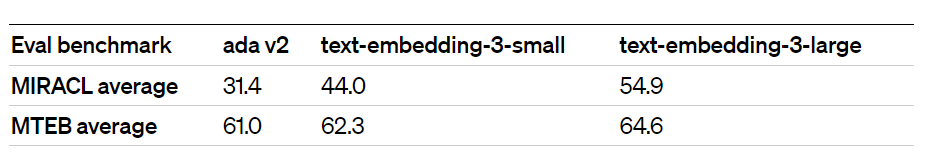

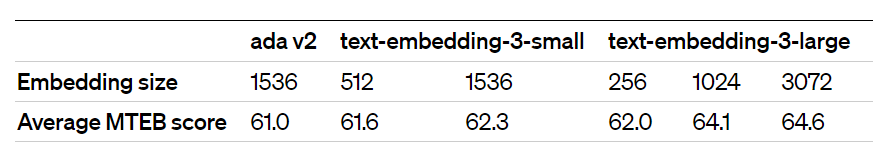

In [ ]:
embeddings_1= client.embeddings.create(
                                      model="text-embedding-3-large",
                                      input="How old are you?",
                                      dimensions=3072)
embeddings_1

CreateEmbeddingResponse(data=[Embedding(embedding=[-0.016812236979603767, -0.002756440779194236, -0.02943851426243782, 0.019862789660692215, -0.018658984452486038, 0.002166507765650749, -0.003402802161872387, 0.00068569032009691, 0.01543059665709734, 0.027838001027703285, -0.019780712202191353, -0.029739465564489365, 0.0006724381819367409, -0.004579248372465372, 0.03548489883542061, 0.06276203691959381, -0.06500548869371414, -0.011935456655919552, -0.05157211795449257, -0.016059858724474907, 0.05729019269347191, 0.010779529809951782, -0.024609612300992012, -0.007941012270748615, -0.005102493334561586, 0.029110204428434372, 0.02356996200978756, -0.02036893554031849, -0.03584057092666626, -0.009240574203431606, 0.006374696735292673, 0.028234709054231644, 0.008563433773815632, 0.0012303096009418368, -0.010266545228660107, 0.0054000248201191425, -0.014281509444117546, -0.020546769723296165, 0.007934171706438065, 0.03045080415904522, 0.006723526865243912, 0.03149045631289482, -0.03099798969

In [ ]:
embeddings_1.data[0].embedding[:10]

[-0.016812236979603767,
 -0.002756440779194236,
 -0.02943851426243782,
 0.019862789660692215,
 -0.018658984452486038,
 0.002166507765650749,
 -0.003402802161872387,
 0.00068569032009691,
 0.01543059665709734,
 0.027838001027703285]

In [ ]:
embeddings_2= client.embeddings.create(
                                      model="text-embedding-3-large",
                                      input="What is your age?",
                                      dimensions=3072)
embeddings_2.data[0].embedding

[-0.005837408825755119,
 -0.010058769024908543,
 -0.025781260803341866,
 0.006702070590108633,
 -0.020162848755717278,
 0.0018567567458376288,
 -0.010912103578448296,
 0.004821714945137501,
 0.014461369253695011,
 0.03461666405200958,
 -0.039963219314813614,
 -0.04219850152730942,
 -0.007966968230903149,
 0.0013583492254838347,
 0.010005908086895943,
 0.0665147453546524,
 -0.024633413180708885,
 -0.009522603824734688,
 -0.034737490117549896,
 -0.011282132938504219,
 0.05878187716007233,
 0.005920476745814085,
 -0.036882154643535614,
 -0.01126702968031168,
 0.0008165198378264904,
 0.04836063086986542,
 0.007657351437956095,
 0.007800832390785217,
 -0.00755162863060832,
 -0.011131100356578827,
 0.0040627759881317616,
 0.016779718920588493,
 0.018803555518388748,
 0.026173945516347885,
 0.020087331533432007,
 0.0026185272727161646,
 -0.0101191820576787,
 -0.00734395906329155,
 0.02260957658290863,
 0.019966505467891693,
 -0.0022938072215765715,
 0.020162848755717278,
 -0.03899661079049110

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([embeddings_1.data[0].embedding], [embeddings_2.data[0].embedding])

array([[0.73466496]])